In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bare_energy = np.load("output/eigvals_Hbare.npy")
eff_energy = np.load("output/eigvals_Heff.npy")

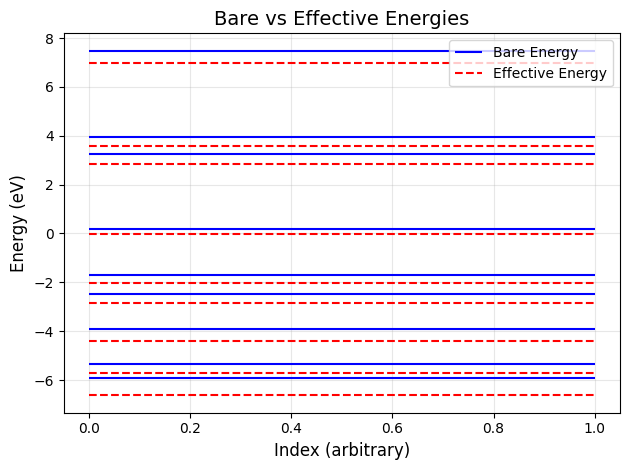

In [3]:
# Define x-axis range for horizontal lines
x_min, x_max = 0, 1  # You can adjust this range as needed

# Plot horizontal lines for bare_energy
for y in bare_energy:
    plt.hlines(y, x_min, x_max, color='blue', linestyles='solid', label='Bare Energy' if 'Bare Energy' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot horizontal lines for eff_energy
for y in eff_energy:
    plt.hlines(y, x_min, x_max, color='red', linestyles='dashed', label='Effective Energy' if 'Effective Energy' not in plt.gca().get_legend_handles_labels()[1] else "")

# Add labels, legend, and title
plt.xlabel('Index (arbitrary)', fontsize=12)
plt.ylabel('Energy (eV)', fontsize=12)
plt.title('Bare vs Effective Energies', fontsize=14)
plt.legend(loc='best')
plt.grid(alpha=0.3)
# plt.ylim(-0.1,0.1)

# Show plot
plt.tight_layout()
plt.show()

In [4]:
bare_energy

array([-5.90978883, -5.35053008, -3.92798319, -2.45851863, -1.69384934,
        0.20105777,  3.24475703,  3.94188042,  7.48839416])

In [5]:
eff_energy

array([-6.63290025, -5.70487172, -4.40907339, -2.85509594, -2.01622631,
       -0.00907163,  2.85842678,  3.5778313 ,  6.99243566])

In [6]:
dft_dos = np.load("output/dft_dos.npy")
z_ret = np.load("output/retarded_energies.npy")
energies = z_ret.real

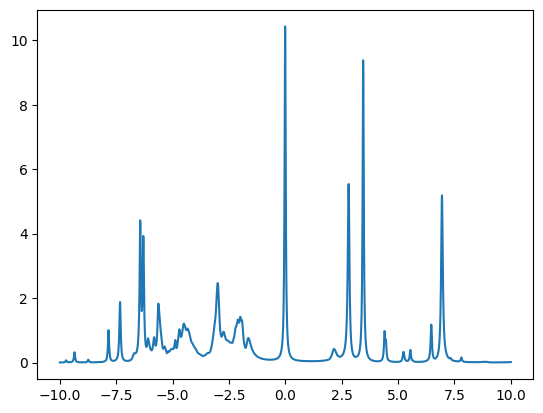

In [7]:
plt.plot(energies, dft_dos)

In [8]:
from scipy.signal import find_peaks
x, peaks = find_peaks(dft_dos, height=4)
energies[x]

array([-6.44, -0.01,  2.81,  3.45,  6.95])

In [11]:
_,T = np.load("output/dft_transmission.npy")
E, Tref_dft = np.load("../beta_1000/output/ET_dft.npy")

/users/ajayaraj/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


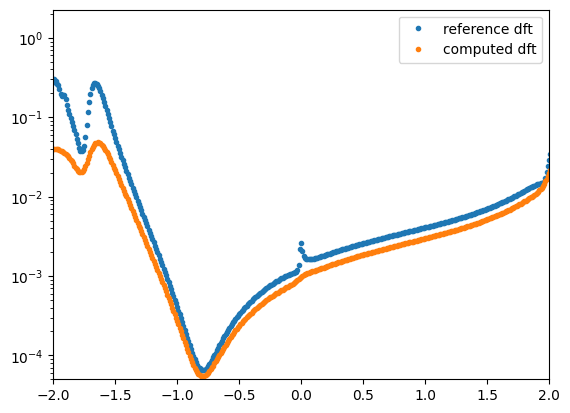

In [12]:
# Plot the reference LCAO transmission data
plt.plot(E, Tref_dft, '.', label="reference dft")

# Plot the computed LCAO transmission data
plt.plot(energies, T, '.',label="computed dft")

# Set the y-axis to a logarithmic scale to better visualize the transmission data
plt.yscale("log")
plt.xlim(-2,2)
plt.ylim(bottom=5e-5)
plt.legend()